# An Introduction to Image Processing

We will be using Jupyter Notebooks for our workshop. We will create and edit notebooks from https://notebooks.azure.com, so no additional software will be required during this class. If you have a browser and an account on Azure Notebooks, you're ready to go.

A notebook allows us to combine interactive code blocks and rich text elements and media in a single, online document. Because notebooks are both machine readable and human readable, they have quickly become a favorite form of sharing scientific, financial, statistical or computational reports. 

For example, http://nbviewer.jupyter.org/github/brianckeegan/Bechdel/blob/master/Bechdel_test.ipynb is a notebook for addressing *The Need for Openness in Data Journalism*. You can see how the author integrates the primary text message with code processing the data to justify the author's conclusions.


Double click on this line to see it in markup. You can *make text italic* or **bold** just as you do in markup. When you are done editing, you press CNTRL-ENTER.

In [1]:
To add a new cell, you can use the menu bar above or just select a cell and press 'b'

SyntaxError: invalid syntax (<ipython-input-1-6ea46fb3439b>, line 1)

If you wanted to type something in markup and the notebook thinks you were trying to write code, you may see something like the error message above. No worries, just select the cell and tell the Notebook that you want to convert it to markup by pressing 'm', then CNTRL-ENTER again.

By default, the cells are expecting code. So for the cell below, just type: print("Hello World!") and press CNTRL-ENTER to run your first line of code

In [2]:
print("Hello World!")

Hello World!


In [3]:
# OUR SECOND LINE OF CODE. USING A # IN PYTHON IS HOW YOU DEFINE A COMMENT
print(5 * 10)

50


# Peaking at Python

Let's use these cells to get a little more familiar with Python, the programming language we'll be using for this workshop.

In [4]:
# using number variables
a = 7
b = 6
print("the answer to everything is:", a*b)

the answer to everything is: 42


In [5]:
# notice that in a python notebook, you can assume a print() command if needed
a*b

42

In [6]:
# Using Dictionaries for more complex data

my_info = dict()
my_info["first"] = "Rick"
my_info["last"] = "Barraza"

print("Hello")
print(my_info["first"])
print(my_info["last"])

Hello
Rick
Barraza


If you have played with Javascript or C#, Python is easier to read, but introduces some formatting you should know about.

In the following cell of code, notice the use of the **colon** and the **indentation** instead of curly braces as used in other langauges:

In [7]:
for i in range(10):
    print("counting up: ", i)

counting up:  0
counting up:  1
counting up:  2
counting up:  3
counting up:  4
counting up:  5
counting up:  6
counting up:  7
counting up:  8
counting up:  9


Similarly, defining a function also uses the colon and line indentation to determine the functionality you want to wrap up:

In [8]:
def DoubleIt(i):
    print(i, " times two is ", i*2)
    
for i in range(10):
    DoubleIt(i)

0  times two is  0
1  times two is  2
2  times two is  4
3  times two is  6
4  times two is  8
5  times two is  10
6  times two is  12
7  times two is  14
8  times two is  16
9  times two is  18


# Loading and Processing Images

Before we dive into Machine Learning and AI, Let's first look at loading and processing images in our Notebook using Python. Python is a very accessible language, and we've already been using it for text and numbers. However, the true power of Python comes from expanding its functionality by importing additional modules.

We will be importing additional modules that give Python the ability to solve AI problems, but before we do, let's give Python the ability to process images in our Notebook. 

Here is one of the easiest ways to load an image that is in the same folder as our notebook:


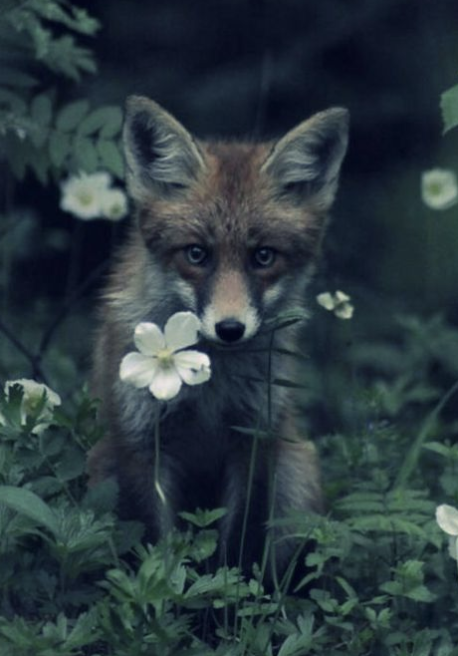

In [9]:
from IPython.display import Image
Image(filename="images/fox.png")

In the above example, we're treating the file explictly like an image and so the notebook displays it on our page as an image, the most *human readable* format.

However, as we start performing computations on our images, we want Python to load the image in a *machine readable* way, as we will want to explore or manipulate the pixel values of the image directly. For this, we will bring in a library called **matplotlib** that specializes in plotting numbers, images, and graphs.

In [10]:
import matplotlib.pyplot as plt
im = plt.imread("images/jellyfish.png")
plt.imshow(im)

Arg! What's wrong? 

Well, when we are using **matplotlib** in a Jupyter Notebook to make the image machine readable, you need to let the notebook *explicitly* know that it is ok to also make it more "human friendly" by automatically converting it to its visual representation when you ask to show it.

To do that, we use the **magic** command: *%matplotlib inline*

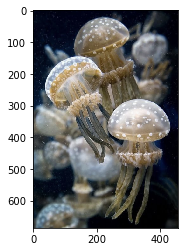

In [11]:
# NOTE: THIS ONLY NEEDS TO BE CALLED ONCE PER NOTEBOOK,
# AND MOST PEOPLE PUT IT AS ONE OF THEIR FIRST COMMANDS
%matplotlib inline

# NOW IT SHOULD DISPLAY THE IMAGE INLINE. 
plt.imshow(im)

But what happens if we don't ask the Notebook to show us the image using matplotlib, but just to show us the image how it exists in the computer's brain? 

Let's try it:


In [12]:
im

array([[[0.00784314, 0.02352941, 0.09411765, 1.        ],
        [0.01568628, 0.03137255, 0.09803922, 1.        ],
        [0.02745098, 0.04313726, 0.10980392, 1.        ],
        ...,
        [0.        , 0.        , 0.02352941, 1.        ],
        [0.00392157, 0.        , 0.02745098, 1.        ],
        [0.00392157, 0.        , 0.02745098, 1.        ]],

       [[0.01960784, 0.03529412, 0.10196079, 1.        ],
        [0.03137255, 0.04705882, 0.11372549, 1.        ],
        [0.04705882, 0.0627451 , 0.12941177, 1.        ],
        ...,
        [0.        , 0.        , 0.02352941, 1.        ],
        [0.00392157, 0.        , 0.02745098, 1.        ],
        [0.00392157, 0.        , 0.02745098, 1.        ]],

       [[0.02745098, 0.04313726, 0.10980392, 1.        ],
        [0.04705882, 0.0627451 , 0.12941177, 1.        ],
        [0.06666667, 0.08235294, 0.14901961, 1.        ],
        ...,
        [0.        , 0.        , 0.02745098, 1.        ],
        [0.00392157, 0.      

We see that the variable **im** which holds our image is treated as a collection (or matrix) of pixel values. 

# GOING DEEPER INTO IMAGE PROCESSING

Let's start exploring this image and exploring its data structure.

We might expect that all the Red, Green, Blue and Alpha pixel values are stored as one long sequence of numbers, possibly at numbers from 0 to 255. But matplotlib automatically organized the image into a multidimensional array (or *tensor*) for us. We can see the size and color channels of our image like this:


In [13]:
im.shape

(686, 456, 4)

We learn a few things here. 

The first two numbers are the height and width of the image. Note that height comes first. For designers getting into Python and matrix math, this seems like a quirk as we are used to saying "width and height". But you'll get use to this quirk. Height comes first.

What do you think that last dimension is for? That tells us how many *channels* are in the image. Remember, we loaded a PNG file, so there is a red, green, blue and alpha channel. That 3rd dimension holds those. 

Let's keep digging...


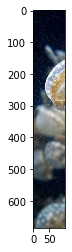

In [14]:
cropped = im[0:685, 0:100, 0:3]
plt.imshow(cropped)

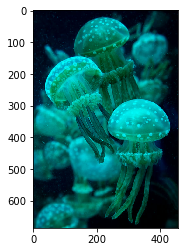

In [15]:
# Let's make a copy of the image so we don't mess up the original
no_red = im.copy()

# And now let's clear out it's RED color channel (remember, our tensor has a 2D matrix for each RGB color channel )
no_red[:,:,0] = 0
plt.imshow(no_red)

In [16]:
#We can also pull out only the RED channel and put it into it's own Image (in this case, a 2D matrix of single values)
red_channel = im[:,:,0]
red_channel.shape

(686, 456)

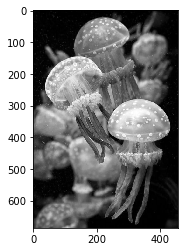

In [17]:
# Notice that we are giving it a specific color map to use ( in this case, cm.gray) for a gray image

# The default color map for matplot is viridis. You can remove the 'cmap=plt.cm.gray' to see viridis instead
# or explore other color map options found here: https://matplotlib.org/users/colormaps.html
plt.imshow(red_channel, cmap=plt.cm.gray)

Now lets go back to our original image and start tweaking some of the pixel values.


(686, 456, 4)

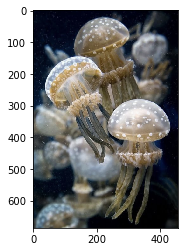

In [18]:
plt.imshow(im)
im.shape

In order to do tweak our tensor of color values, we're going to import one more module called *numpy* that is used for various numerical operations, including generating random numbers.

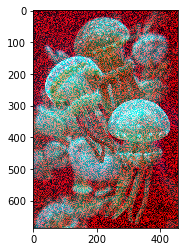

In [19]:
import numpy as np

# Let's replace the RED channel or our (RGB) data with randomly generated numbers...
im[:,:,0] = np.random.rand(686, 456)
plt.imshow(im)

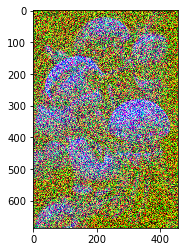

In [20]:
im[:,:,1] = np.random.rand(686, 456)
plt.imshow(im)

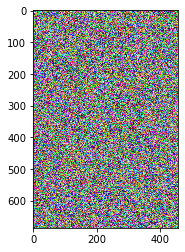

In [21]:
im[:,:,2] = np.random.rand(686, 456)
plt.imshow(im)

# CONCLUSION

Congratulations! You've setup your first notebook and got up to speed writing Python. We also looked at loading images and using matplotlib and numpy to perform various operations and see what our images are made up. In our next Notebook, we will jump building our first neural network.
